### IMMAS Test Your Mammogram Notebook

A notebook, which requires as input, an image, and shows preprocessing, segementation, feature extraction, and classification

Installing the IMMAS package -> python setup.py install

In [1]:
# Test immas package installation
import immas

In [1]:
# Import required packages
from immas import preprocessing, segmentation, features, classification, basic_functions
import sklearn
import pickle
import cv2

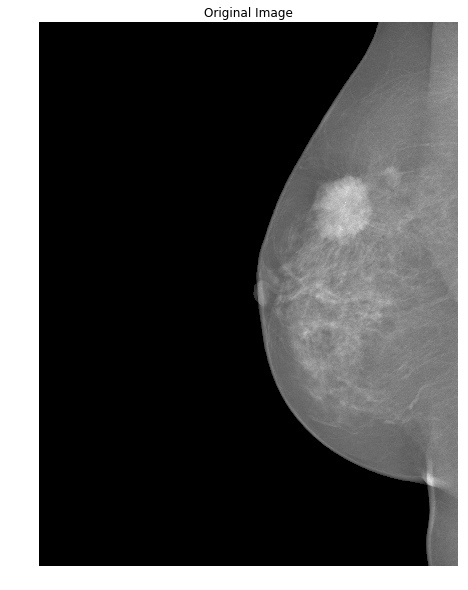

In [2]:
###### Set path to image to operate upon #####
###### Do not change any other code in notebook ######
file_path = "/Users/briannaburton/Documents/Masters/S2-Cassino/Advanced-Image-Analysis/AIA-2018/dataset/masses_examples/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
image = cv2.imread(file_path,0)
basic_functions.show_image_plt(image,"Original Image")

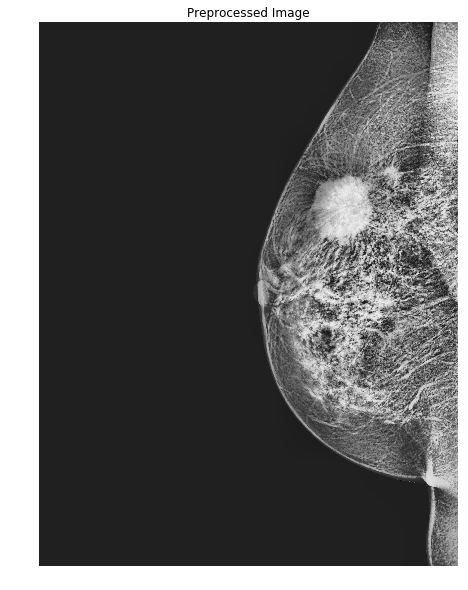

In [3]:
# Preprocess the image using openning with a 5x5 kernel, morphological enchancement
# with a 20x20 kernel and clahe kernel of 12, and perform a wavelet transform using
# a kernel sized 5
preprocessed_image = preprocessing.fullPreprocessing(image)
basic_functions.show_image_plt(preprocessed_image,"Preprocessed Image")

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


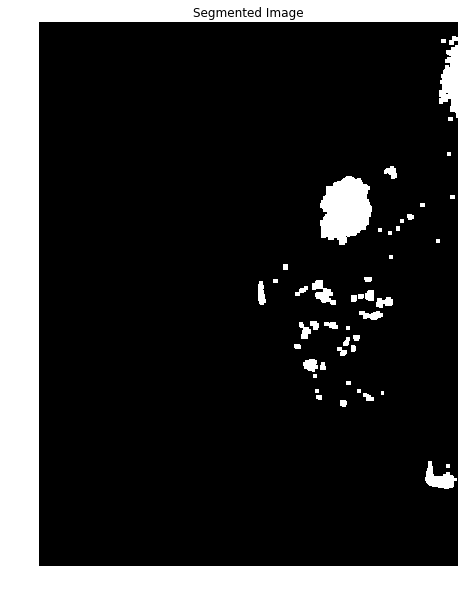

In [4]:
# Segment the preprocessed image using multithrehsolding with 2 thresholds, opening with a
# 23x23 kernel, and closing with a 5x5 kernel

segmented_image = segmentation.fullSegmentation(preprocessed_image)
basic_functions.show_image_plt(segmented_image,"Segmented Image")

In [5]:
# Extract features each region in the segmented image
features_df, regions, _ = features.get_img_features(image, contour_max_number=None)
features_df = features_df.drop(['class_id'], axis=1)
features_df

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):
/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/features/intensity.py:232: RuntimeWarning: overflow encountered in ubyte_scalars


,perimeter,area,circularity,ac,shape_factor,mean NRL,SD NRL,Ratio SD NRL and mean RL,entropy NRL,NCPS,...,kurtosis,correlation,contrast,uniformity,homogeneity,energy,dissimilarity,gradient mean,gradient SD,gradient skewness
0,1597.605119,96899.5,2.096078,46228.952115,26.340096,0.764839,0.104351,0.000592,5.643010,0.001557,...,32326.103878,1.0,0.0,1.0,1.0,1.0,0.0,42.719298,84.856609,2.054369
1,1613.195958,34340.0,6.030650,5694.245606,75.783378,0.535811,0.223266,0.001596,4.852404,0.003640,...,1766.264453,1.0,0.0,1.0,1.0,1.0,0.0,145.007143,123.612557,-0.288028
2,749.438599,16230.5,2.753787,5893.883502,34.605109,0.573099,0.205435,0.002820,4.540839,0.005009,...,313994.731407,1.0,0.0,1.0,1.0,1.0,0.0,113.564356,113.047910,0.362300
3,751.639609,11047.5,4.069541,2714.679532,51.139362,0.548036,0.198734,0.003408,4.566694,0.000724,...,5143.540173,1.0,0.0,1.0,1.0,1.0,0.0,100.932039,119.663303,0.456260
4,345.112698,5614.0,1.688261,3325.315095,21.215314,0.783352,0.094270,0.002314,3.864010,0.007944,...,1305.942163,1.0,0.0,1.0,1.0,1.0,0.0,61.562500,104.136110,1.285960
5,428.325901,5115.5,2.853979,1792.410042,35.864153,0.463453,0.228763,0.006244,4.107837,0.009385,...,3043.412174,1.0,0.0,1.0,1.0,1.0,0.0,73.043478,109.855034,1.004015
6,363.840620,4886.5,2.155830,2266.643947,27.090964,0.658190,0.242313,0.004794,3.966450,0.004427,...,2339.322993,1.0,0.0,1.0,1.0,1.0,0.0,21.842105,34.491183,5.407154
7,369.455844,4822.0,2.252620,2140.618112,28.307263,0.625011,0.250642,0.006949,3.672944,0.004438,...,3242.300341,1.0,0.0,1.0,1.0,1.0,0.0,96.325581,120.533257,0.528747
8,323.455844,3908.0,2.130422,1834.378581,26.771669,0.650763,0.215285,0.006681,3.701680,0.012671,...,1350.369155,1.0,0.0,1.0,1.0,1.0,0.0,86.000000,115.680997,0.742860
9,361.455844,3906.0,2.661757,1467.451787,33.448624,0.535556,0.192589,0.005760,3.573128,0.006192,...,10044.057487,1.0,0.0,1.0,1.0,1.0,0.0,121.894737,123.893798,0.104351


In [6]:
# Normalize features to run the classifier
features_data = features_df.as_matrix()
features_data = sklearn.preprocessing.StandardScaler().fit_transform(features_data)
# Import the SVM and Random Forest classifiers
with open("./models/SVM_classifier.pkl", "rb") as fid:
    SVM_classifier = pickle.load(fid)
with open("./models/rf_class_no_lbp.pkl", "rb") as fid:
    RF_classifier = pickle.load(fid)

SVM Predictions [ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


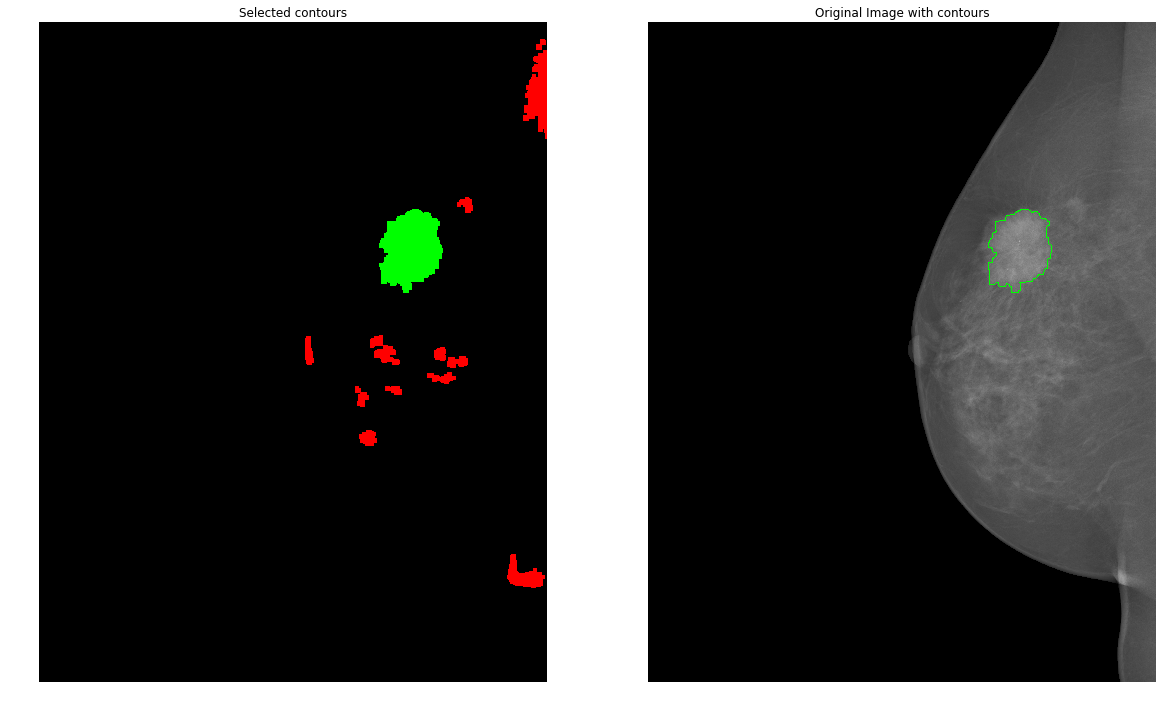

In [16]:
# Run the SVM classifier for the image and output region predictions
predictionsSVM = SVM_classifier.predict(features_data)
print("SVM Predictions:", predictionsSVM)
# Display a visual result for the SVM classifier
basic_functions.show_pos_neg_regions(image,regions,predictionsSVM)

Random Forest Predictions: [ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


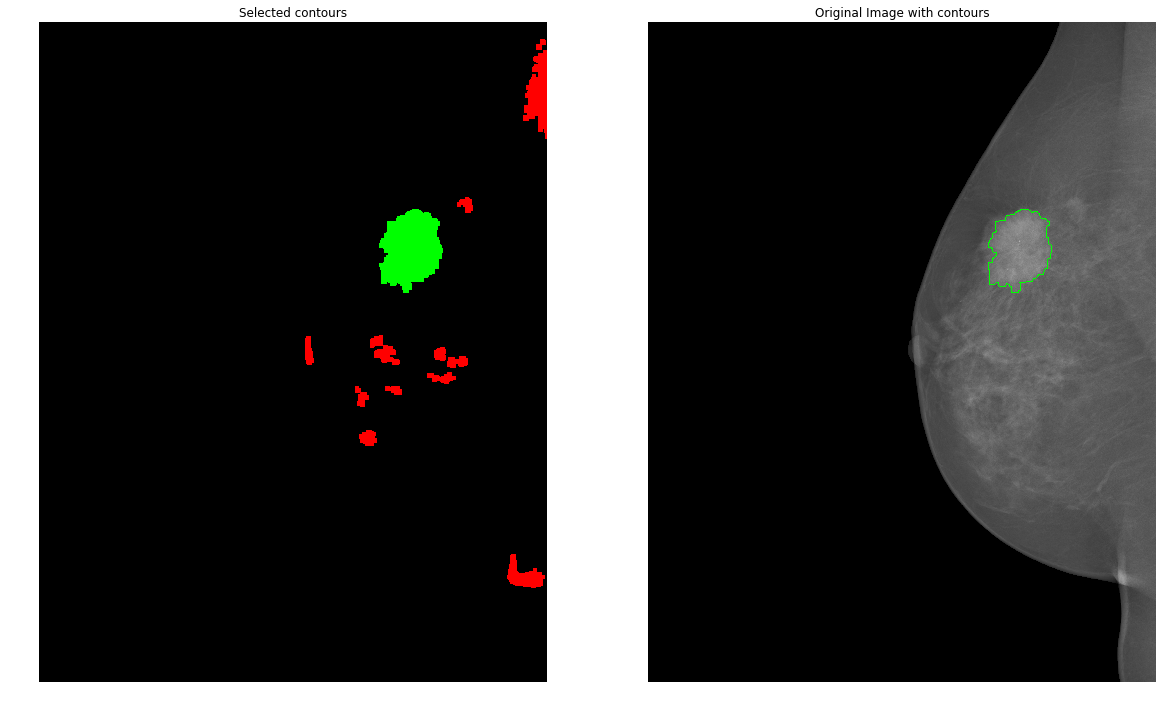

In [18]:
# Run the Random Forest classifier for the image and output region predictions
predictionsRF = RF_classifier.predict(features_data)
print("Random Forest Predictions:", predictionsRF)
# Display a visual result for the Random Forest classifier
basic_functions.show_pos_neg_regions(image,regions,predictionsRF)